<a href="https://colab.research.google.com/github/CommanderWedgeAntilles/CS450/blob/master/Week05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd

hr = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/hr.csv')

#diverseAttributes: Sex, DOB(sample_str[-2]), RaceDesc, HispanicLatino, and CitizenDesc. 
#diverseSpread:  Department
#uniqueID EmpID
hr.head()

,Employee_Name,EmpID,PayRate,Position,State,Zip,DOB,Sex,MaritalDesc,Dependents,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,EmpSatisfaction2,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,AbsencesLast30
0,"Brown, Mia",1103024456,59280.0,Accountant I,MA,1450,11/24/87,F,Married,0,US Citizen,No,Black or African American,10/27/08,NaN,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets,4.08,2,93,9,1/15/19,0.0,1
1,"LaRotonda, William",1106026572,47840.0,Accountant I,MA,1460,4/26/84,M,Divorced,4,US Citizen,No,Black or African American,1/6/14,NaN,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,Website Banner Ads,Fully Meets,10.00,4,75,7,1/17/19,0.0,2
2,"Steans, Tyrone",1302053333,60320.0,Accountant I,MA,2703,9/1/86,M,Single,2,US Citizen,No,White,9/29/14,NaN,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,Internet Search,Fully Meets,7.80,5,60,6,1/18/19,0.0,7
3,"Howard, Estelle",1211050782,44720.0,Administrative Assistant,MA,2170,9/16/85,F,Married,3,US Citizen,No,White,2/16/15,4/15/15,NaN,Terminated for Cause,Admin Offices,Brandon R. LeBlanc,Pay Per Click - Google,Fully Meets,6.48,3,83,0,NaN,NaN,2
4,"Singh, Nan",1307059817,34444.8,Administrative Assistant,MA,2330,5/19/88,F,Single,4,US Citizen,No,White,5/1/15,NaN,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,Website Banner Ads,Fully Meets,10.00,3,36,3,1/15/19,0.0,2


In [51]:
hr.Department.value_counts()

Production              208
IT/IS                    50
Sales                    31
Software Engineering     10
Admin Offices            10
Executive Office          1
Name: Department, dtype: int64

In [58]:
production = hr[ hr['Department'] == 'Production       ']
production

,Employee_Name,EmpID,PayRate,Position,State,Zip,DOB,Sex,MaritalDesc,Dependents,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,EmpSatisfaction2,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,AbsencesLast30,DOBconv,Today,Age
53,"Bramante, Elisa",1006020066,124800.0,Director of Operations,MA,2030,3/19/83,F,Single,2,US Citizen,No,Black or African American,1/5/09,NaN,N/A - still employed,Active,Production,Janet King,Other,Exceeds,6.04,5,85,8,2/4/19,0.0,7,1983-03-19,2020-10-09,37.561346
74,"Albert, Michael",1501072311,113360.0,Production Manager,MA,2169,10/10/68,M,Divorced,5,US Citizen,No,White,8/1/11,NaN,N/A - still employed,Active,Production,Janet King,Employee Referral,Fully Meets,7.86,3,100,10,2/27/19,0.0,5,2068-10-10,2020-10-09,-48.003724
75,"Bozzi, Charles",1303054580,105040.0,Production Manager,MA,1901,3/10/70,M,Single,3,US Citizen,No,Asian,9/30/13,8/7/14,retiring,Voluntarily Terminated,Production,Janet King,Billboard,Fully Meets,6.78,3,72,7,NaN,NaN,7,1970-03-10,2020-10-09,50.585570
76,"Butler, Webster L",1110029990,114400.0,Production Manager,MA,2169,8/9/83,M,Single,1,US Citizen,No,White,1/28/16,NaN,N/A - still employed,Active,Production,Janet King,Pay Per Click - Google,Exceeds,10.00,3,39,3,2/22/19,0.0,3,1983-08-09,2020-10-09,37.169826
77,"Dunn, Amy",1409070147,106080.0,Production Manager,MA,1731,11/28/73,F,Single,1,US Citizen,No,White,9/18/14,NaN,N/A - still employed,Active,Production,Janet King,Search Engine - Google Bing Yahoo,Fully Meets,9.04,4,23,2,1/15/19,0.0,6,1973-11-28,2020-10-09,46.864754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,"Fancett, Nicole",1402065085,24.0,Production Technician II,MA,2324,9/27/87,F,?,3,US Citizen,No,Black or African American,2/17/14,NaN,N/A - still employed,Active,Production,Webster Butler,Newspager/Magazine,Fully Meets,8.00,4,27,2,1/7/19,0.0,2,1987-09-27,2020-10-09,33.035586
277,"Hutter, Rosalie",1103024924,28.0,Production Technician II,MA,2351,5/7/92,F,Separated,1,US Citizen,No,White,6/5/15,NaN,N/A - Has not started yet,Future Start,Production,Webster Butler,Other,Fully Meets,5.26,3,70,7,2/14/19,0.0,1,1992-05-07,2020-10-09,28.424951
278,"Manchester, Robyn",1110029623,23.0,Production Technician II,MA,2324,8/25/76,F,Married,0,US Citizen,No,White,5/11/16,NaN,N/A - Has not started yet,Future Start,Production,Webster Butler,Vendor Referral,Fully Meets,10.00,3,61,6,1/21/19,0.0,1,1976-08-25,2020-10-09,44.124109
279,"Oliver, Brooke",1001856521,25.0,Production Technician II,MA,2492,2/11/52,F,Married,1,US Citizen,No,Asian,5/14/12,8/19/13,unhappy,Voluntarily Terminated,Production,Webster Butler,Newspager/Magazine,Fully Meets,10.00,3,91,9,NaN,NaN,2,2052-02-11,2020-10-09,-31.340822


In [59]:
#seperate by department
itis = hr[ hr['Department'] == 'IT/IS']
sales = hr[ hr['Department'] == 'Sales']
se = hr[ hr['Department'] == 'Software Engineering']
admin = hr[ hr['Department'] == 'Admin Offices']
executive = hr[ hr['Department'] == 'Executive Office']
production = hr[ hr['Department'] == 'Production       ']


In [60]:
#no data exists in the production department for some reason
production.loc[:,"RaceDesc"].value_counts()
production.loc[:,"Sex"].value_counts()

F     127
M      81
Name: Sex, dtype: int64

In [48]:
sales.loc[:,"RaceDesc"].mode()

#White
sales.loc[:,"RaceDesc"].value_counts()
sales.loc[:,"Sex"].value_counts()


M     16
F     15
Name: Sex, dtype: int64

In [ ]:
hr.loc[:, "Department"].value_counts()

Production              208
IT/IS                    50
Sales                    31
Software Engineering     10
Admin Offices            10
Executive Office          1
Name: Department, dtype: int64

In [49]:
itis.loc[:,"RaceDesc"].value_counts()
itis.loc[:,"Sex"].value_counts()

M     28
F     22
Name: Sex, dtype: int64

In [10]:
se.loc[:,"RaceDesc"].value_counts()
se.loc[:,"Sex"].value_counts()

F     6
M     4
Name: Sex, dtype: int64

In [11]:
admin.loc[:,"RaceDesc"].value_counts()
admin.loc[:,"Sex"].value_counts()

F     6
M     4
Name: Sex, dtype: int64

In [12]:
executive.loc[:,"RaceDesc"].value_counts()
executive.loc[:,"Sex"].value_counts()

F    1
Name: Sex, dtype: int64

[Simpson's Diversity Index](https://www.statisticshowto.com/simpsons-diversity-index/)

D = 1 - (sum(n(n-1)))/(N(N-1))

100 80 5 5 10
---


n = number of individuals of **each** race/ gender/ age

---


N = total number of individuals of **all** races/ genders/ age

This is what we will use to determine Diversity on a Department level basis and for the Company overall.


---

High scores(close to 1) show high diversity


---
Low scores(close to 0) show low diversity



In [70]:
def Diversity (x,X):
  frac = x/X
  return 1 - frac

In [71]:
def n(rge):
    n = 0
    for x in rge:
      n += ((x-1)*x)
    print(n)
    return n


In [72]:
def N(val):
  return((val-1)*val)

In [73]:
def calc(x,y):
    ni = n(x)
    Ni = N(y)
    SDI = Diversity(ni,Ni)
    return SDI


In [213]:
production.loc[:,"RaceDesc"].value_counts()
production.loc[:,"Sex"].value_counts()

White                               138
Black or African American            32
Asian                                22
Two or more races                    10
Hispanic                              3
American Indian or Alaska Native      3
Name: RaceDesc, dtype: int64

In [106]:
productionRacialD = calc([138,32,22,10,3,3],208)
productionSexD = calc([127,81],208)
print(productionRacialD)
print(productionSexD)

20462
22482
0.5247584541062802
0.4778428093645485


1-(((28-1)28)+((22-1)22))/((50-1)50) = SDI = 0.692
1- (756)

In [107]:
itisRacialD = calc([30,10,7,2,1],50)
itisSexD = calc([28,22],50)
print(itisRacialD)
print(itisSexD)

1004
1218
0.590204081632653
0.5028571428571429


In [109]:
seRacialD = calc([5,3,2],10)
seSexD = calc([4,6],10)
print(seRacialD)
print(seSexD)

28
42
0.6888888888888889
0.5333333333333333


In [110]:
adminRacialD = calc([5,3,2],10)
adminSexD = calc([4,6],10)
print(adminRacialD)
print(adminSexD)

28
42
0.6888888888888889
0.5333333333333333


In [111]:
salesRacialD = calc([14,9,6,1,1],31)
salesSexD = calc([16,15],31)
print(salesRacialD)
print(salesSexD)
#barplot

284
450
0.6946236559139785
0.5161290322580645


In [99]:
hr.loc[:, "RaceDesc"].value_counts()
companySexD = calc([193,57,34,18,4,4],310)
print(companyRacialD)

41700
0.5646727215784528


In [93]:
hr.loc[:, "Sex"].value_counts()
companySexD = calc([133,177],310)
print(companySexD)

48708
0.4915126839962418


In [43]:
import numpy as np

hr["DOBconv"] = pd.to_datetime(hr['DOB'])
hr["Today"] = "10/9/2020"
hr["Today"] = pd.to_datetime(hr['Today'])
hr["Age"] = hr["Today"]-hr["DOBconv"]
hr["Age"] = hr["Age"]/np.timedelta64(1,'Y')
hr.head()

,Employee_Name,EmpID,PayRate,Position,State,Zip,DOB,Sex,MaritalDesc,Dependents,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,EmpSatisfaction2,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,AbsencesLast30,DOBconv,Today,Age
0,"Brown, Mia",1103024456,59280.0,Accountant I,MA,1450,11/24/87,F,Married,0,US Citizen,No,Black or African American,10/27/08,NaN,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets,4.08,2,93,9,1/15/19,0.0,1,1987-11-24,2020-10-09,32.876787
1,"LaRotonda, William",1106026572,47840.0,Accountant I,MA,1460,4/26/84,M,Divorced,4,US Citizen,No,Black or African American,1/6/14,NaN,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,Website Banner Ads,Fully Meets,10.00,4,75,7,1/17/19,0.0,2,1984-04-26,2020-10-09,36.455232
2,"Steans, Tyrone",1302053333,60320.0,Accountant I,MA,2703,9/1/86,M,Single,2,US Citizen,No,White,9/29/14,NaN,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,Internet Search,Fully Meets,7.80,5,60,6,1/18/19,0.0,7,1986-09-01,2020-10-09,34.106108
3,"Howard, Estelle",1211050782,44720.0,Administrative Assistant,MA,2170,9/16/85,F,Married,3,US Citizen,No,White,2/16/15,4/15/15,NaN,Terminated for Cause,Admin Offices,Brandon R. LeBlanc,Pay Per Click - Google,Fully Meets,6.48,3,83,0,NaN,NaN,2,1985-09-16,2020-10-09,35.064375
4,"Singh, Nan",1307059817,34444.8,Administrative Assistant,MA,2330,5/19/88,F,Single,4,US Citizen,No,White,5/1/15,NaN,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,Website Banner Ads,Fully Meets,10.00,3,36,3,1/15/19,0.0,2,1988-05-19,2020-10-09,32.392178


In [94]:
import numpy as np
def getAge(dataSet):
  dataSet["DOBconv"] = pd.to_datetime(dataSet['DOB'])
  dataSet["Today"] = "10/9/2020"
  dataSet["Today"] = pd.to_datetime(dataSet['Today'])
  dataSet["Age"] = dataSet["Today"]-hr["DOBconv"]
  dataSet["Age"] = dataSet["Age"]/np.timedelta64(1,'Y')
  dataSet["Age"] = dataSet["DOB"]
  return dataSet

 



In [84]:

hr.loc[:, "RecruitmentSource"].value_counts()

Employee Referral                         31
Diversity Job Fair                        29
Search Engine - Google Bing Yahoo         25
Monster.com                               24
Pay Per Click - Google                    21
Professional Society                      20
Newspager/Magazine                        18
MBTA ads                                  17
Billboard                                 16
Vendor Referral                           15
Glassdoor                                 14
Word of Mouth                             13
Website Banner Ads                        13
On-campus Recruiting                      12
Social Networks - Facebook Twitter etc    11
Other                                      9
Indeed                                     8
Internet Search                            6
Information Session                        4
Pay Per Click                              1
On-line Web application                    1
Careerbuilder                              1
Company In

In [85]:
hr.loc[:, "RaceDesc"].value_counts()


White                               193
Black or African American            57
Asian                                34
Two or more races                    18
Hispanic                              4
American Indian or Alaska Native      4
Name: RaceDesc, dtype: int64

to be merged:


---


on-line web application, Indeed, Glassdoor, Monster.com, Careerbuilder


---

pay per click, pay per click - google, Internet Search, Search Engine - GBY,


---

Employee Referral, Company Intranet, Vender Referral, Word of Mouth


---
Newspaper/Magazine, Billboard, MTBA ads


---


social networking, website banner ads,


---
Information session, on-campus recruiting



In [95]:
emre = hr[ hr['RecruitmentSource'] == 'Employee Referral']
div = hr[ hr['RecruitmentSource'] == 'Diversity Job Fair'] #
seGBY = hr[ hr['RecruitmentSource'] == 'Search Engine - Google Bing Yahoo']
monster = hr[ hr['RecruitmentSource'] == 'Monster.com']
ppcG = hr[ hr['RecruitmentSource'] == 'Pay Per Click - Google']
ps = hr[ hr['RecruitmentSource'] == 'Professional Society'] #
nm = hr[ hr['RecruitmentSource'] == 'Newspager/Magazine']
mbta = hr[ hr['RecruitmentSource'] == 'MBTA ads']
bill = hr[ hr['RecruitmentSource'] == 'Billboard']
vr = hr[ hr['RecruitmentSource'] == 'Vendor Referral']
glass = hr[ hr['RecruitmentSource'] == 'Glassdoor']
wom = hr[ hr['RecruitmentSource'] == 'Word of Mouth']
wba = hr[ hr['RecruitmentSource'] == 'Website Banner Ads']
ocr = hr[ hr['RecruitmentSource'] == 'On-campus Recruiting']
sn = hr[ hr['RecruitmentSource'] == 'Social Networks - Facebook Twitter etc ']
other  = hr[ hr['RecruitmentSource'] == 'Other'] #
indeed = hr[ hr['RecruitmentSource'] == 'Indeed']
seo = hr[ hr['RecruitmentSource'] == 'Internet Search']
info = hr[ hr['RecruitmentSource'] == 'Information Session']
ppc = hr[ hr['RecruitmentSource'] == 'Pay Per Click']
owa = hr[ hr['RecruitmentSource'] == 'On-line Web application']
cb = hr[ hr['RecruitmentSource'] == 'Careerbuilder']
cip = hr[ hr['RecruitmentSource'] == 'Company Intranet - Partner']

In [97]:
apps = pd.concat([owa,indeed,glass,monster,cb])
search = pd.concat([seGBY,ppcG,ppc,seo])
referral = pd.concat([emre,cip,vr,wom])
pysAd = pd.concat([nm,bill,mbta])
webAd = pd.concat([sn,wba])
student= pd.concat([info,ocr])
#div
#ps
#other

In [118]:
apps.loc[:,"RaceDesc"].value_counts()
apps.loc[:,"Sex"].value_counts()

appsRacialD = calc([30,10,8,0,0,0],48)
appsSexD = calc([18,30],48)
print(appsRacialD)
print(appsSexD)

1016
1176
0.549645390070922
0.4787234042553191


In [148]:
search.loc[:,"RaceDesc"].value_counts()
search.loc[:,"Sex"].value_counts()

searchRacialD = calc([38,5,6,2,1,1],53)
searchSexD = calc([19,34],53)
print(searchRacialD)
print(searchSexD)

1458
1464
0.4709724238026125
0.4687953555878084


In [125]:
referral.loc[:,"RaceDesc"].value_counts()
referral.loc[:,"Sex"].value_counts()

referralRacialD = calc([49,7,2,1,0,1],60)
referralSexD = calc([31,29],60)
print(referralRacialD)
print(referralSexD)

2396
1742
0.3231638418079096
0.507909604519774


F     32
M     19
Name: Sex, dtype: int64

In [129]:
pysAd.loc[:,"RaceDesc"].value_counts()
pysAd.loc[:,"Sex"].value_counts()

psyAdRacialD = calc([33,9,5,3,0,1],51)
psyAdSexD = calc([19,32],51)
print(psyAdRacialD)
print(psyAdSexD)

1154
1334
0.5474509803921568
0.47686274509803916


In [133]:
webAd.loc[:,"RaceDesc"].value_counts()
webAd.loc[:,"Sex"].value_counts()

webAdRacialD = calc([7,4,1,1,0,0],13)
webAdSexD = calc([7,6],13)
print(webAdRacialD)
print(webAdSexD)

54
72
0.6538461538461539
0.5384615384615384


In [114]:
student.loc[:,"RaceDesc"].value_counts()
student.loc[:,"Sex"].value_counts()

studentRacialD = calc([8,4,4,0,0,0],16)
studentSexD = calc([9,7],16)
print(studentRacialD)
print(studentSexD)

80
114
0.6666666666666667
0.525


In [139]:
div.loc[:,"RaceDesc"].value_counts()
div.loc[:,"Sex"].value_counts()

divRacialD = calc([1,12,5,3,1,0],29)
divSexD = calc([14,15],29)
print(divRacialD)
print(divSexD)

158
392
0.8054187192118226
0.5172413793103448


In [142]:
ps.loc[:,"RaceDesc"].value_counts()
ps.loc[:,"Sex"].value_counts()

psRacialD = calc([13,4,1,2,0,0],20)
psSexD = calc([10,10],20)
print(psRacialD)
print(psSexD)

170
180
0.5526315789473684
0.5263157894736843


In [145]:
other.loc[:,"RaceDesc"].value_counts()

White                        6
Black or African American    1
Two or more races            1
Asian                        1
Name: RaceDesc, dtype: int64

In [146]:
other.loc[:,"RaceDesc"].value_counts()
other.loc[:,"Sex"].value_counts()

otherRacialD = calc([6,1,1,1,0,0],9)
otherSexD = calc([2,7],9)
print(otherRacialD)
print(otherSexD)

30
44
0.5833333333333333
0.38888888888888884


In [190]:
RecruitDiversity =pd.DataFrame({'Recruit Source':['Apps','Search','Referral','Physical Ads','Web Ads','Student','Diversity Fair','Professional Society','Other', 'Overall'], 
              'Racial Diversity':[0.550,0.471,0.323,0.547,0.654,0.667,0.805,0.553,0.583,0.565], 
              'Gender Diversity':[0.479,0.469,0.508,0.477,0.538,0.525,0.517,0.526,0.389,0.492], 
              'Racial Mode':['White','White','White','White','White','White','Black or African American','White','White','White'],
              'Gender Mode':['F','F','M','F','M','M','F','E','F','F']}, 
             columns=['Recruit Source','Racial Diversity','Racial Mode','Gender Diversity','Gender Mode'])
RecruitDiversity


,Recruit Source,Racial Diversity,Racial Mode,Gender Diversity,Gender Mode
0,Apps,0.550,White,0.479,F
1,Search,0.471,White,0.469,F
2,Referral,0.323,White,0.508,M
3,Physical Ads,0.547,White,0.477,F
4,Web Ads,0.654,White,0.538,M
5,Student,0.667,White,0.525,M
6,Diversity Fair,0.805,Black or African American,0.517,F
7,Professional Society,0.553,White,0.526,E
8,Other,0.583,White,0.389,F
9,Overall,0.565,White,0.492,F


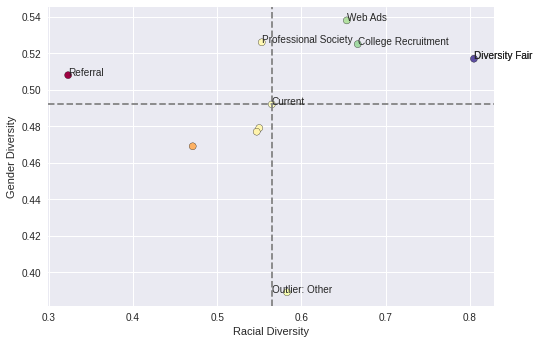

In [209]:
import matplotlib.pyplot as plt
x = RecruitDiversity['Racial Diversity']
y = RecruitDiversity['Gender Diversity']
plt.xlabel('Racial Diversity')
plt.ylabel('Gender Diversity')
plt.axvline(0.565, c=(0.5,0.5,0.5), ls='--')
plt.axhline(0.492, c=(0.5,0.5,0.5), ls='--')
plt.annotate("Diversity Fair", xy=[0.805,0.517])
plt.annotate("Referral", xy=[0.323,0.508])
plt.annotate("Current", xy=[0.565,0.492])
plt.annotate("Web Ads", xy=[0.654,0.538])
plt.annotate("College Recruitment", xy=[0.667,0.525])
plt.annotate("Professional Society", xy=[0.553,0.526])
plt.annotate("Diversity Fair", xy=[0.805,0.517])
plt.annotate("Outlier: Other", xy=[0.565,0.389])
plt.style.use('seaborn')
plt.scatter(x,y, c=x, cmap='Spectral', edgecolor='k')

In [223]:
DepartmentDiversity =pd.DataFrame({'Department':['Production','IT/IS','Sales','Software Engineering','Admin Offices','Executive Offices', 'Overall'], 
              'Racial Diversity':[0.525,0.590,0.695,0.689,0.689,0,0.565], 
              'Gender Diversity':[0.478,0.503,0.516,0.533,0.533,0,0.492], 
              'Racial Mode':['White','White','White','White','White','White','White'],
              'Gender Mode':['F','M','M','F','F','F','F']}, 
             columns=['Department','Racial Diversity','Racial Mode','Gender Diversity','Gender Mode'])
DepartmentDiversity

,Department,Racial Diversity,Racial Mode,Gender Diversity,Gender Mode
0,Production,0.525,White,0.478,F
1,IT/IS,0.590,White,0.503,M
2,Sales,0.695,White,0.516,M
3,Software Engineering,0.689,White,0.533,F
4,Admin Offices,0.689,White,0.533,F
5,Executive Offices,0.000,White,0.000,F
6,Overall,0.565,White,0.492,F


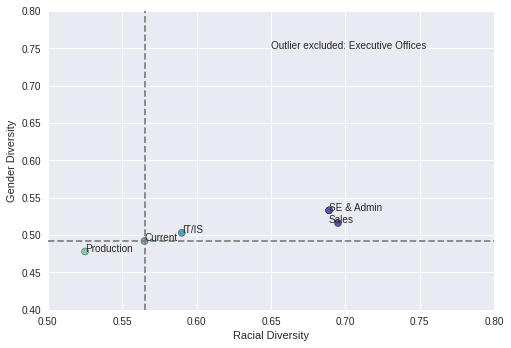

In [236]:
x = DepartmentDiversity['Racial Diversity']
y = DepartmentDiversity['Gender Diversity']
plt.xlabel('Racial Diversity')
plt.ylabel('Gender Diversity')
plt.axvline(0.565, c=(0.5,0.5,0.5), ls='--')
plt.axhline(0.492, c=(0.5,0.5,0.5), ls='--')
plt.annotate("Current", xy=[0.565,0.492])
plt.annotate("Production", xy=[0.525,0.478])
plt.annotate("SE & Admin", xy=[0.689,0.533])
plt.annotate("Sales", xy=[0.689,0.516])
plt.annotate("IT/IS", xy=[0.590,0.503])
plt.annotate("Outlier excluded: Executive Offices", xy=[0.65,0.75])
plt.style.use('seaborn')
plt.xlim(left=0.5, right=0.8)
plt.ylim(bottom=0.4,top=0.8)
plt.scatter(x,y, c=x, cmap='Spectral', edgecolor='k')